
---
<big><big><big><big><big><big>Sieci neuronowe 2018</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Sieci autoasocjacyjne</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [21]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

#from bokeh.io import gridplot, output_file, show
#from bokeh.plotting import figure, output_notebook
#from bkcharts import Scatter

import random

In [ ]:
output_notebook()

In [ ]:
sns.set(font_scale=2.0)

Image inclusion
<img src="nn_figures/" width="100%">

# Reguła Hebba
> Jeśli akson neuronu A jest wystarczająco blisko neuronu B i regularnie bierze udział w jego aktywacji, wtedy następuje pewien proces wzrostu lub zmian metabolicznych w obu komórkach tak, że zdolność A do aktywacji B wzrasta (Donald Hebb, 1949)


1. reguła __uczenia hebbowskiego__ spowoduje wzrost wag $w_{mn}$ i $w_{nm}$
  $$\dfrac{dw_{ij}}{dt}\propto x_i^Tx_j$$
2. to jest uczenie __asocjacyjne__ z lokalną regułą aktywacji
  $$\Delta w_{ij}=\eta x_i() y_j()$$
  * nauczanie bez nauczyciela
  * korelacyjne
  * jeśli istnieje struktura, to tworzy pamięć asocjacyjną

# Pamięć asocjacyjna
1. __auto__-asocjacja $$\{x_1,\dots,x_N\} \hskip2em\text{z}\hskip2em \{x_1,\dots,x_N\} $$
2. __hetero__-asocjacja $$\{x_1,\dots,x_N\} \hskip2em\text{z}\hskip2em \{y_1,\dots,y_N\} $$
3. prosty sposób zdefiniowania wag
$$\begin{align*}
W=&W_{1}+\dots+W_{n}\\
W_{k}=&[y_{k}(x_{k})^{T}]\\
x_{k}W=&x_{k}(W_{1}+\dots+W_{n})
\end{align*}$$

4. odpowiedź składa się z poprawnego sygnału oraz szumu
$$\begin{align*}
(x_k)^{T}W=&(x_k)^{T}(W_1+W_2+\dots+W_m)\\
=&(x_k)^{T}W_k+\sum_{i\neq k}(x_k)^{T}W_i\\
=&\underbrace{y_k(x_k^T x_k)}_{sygnał}+\underbrace{\sum_{i\neq k}y_i(x_i^Tx_k)}_{szum}
\end{align*}$$
  * co zrobić, by odtwarzany był idealny sygnał?
  * szum musi być zerowy
  * wyktory muszą być parami ortogonalne by $x_i^Tx_j=0$
    * nierealne - pamięć ograniczona do liczby wymiarów
  * a gdyby wprowadzić __nieliniowość__ $y_k=x_k^TW$?
    * zakładamy, że wektory są kodowane za pomocą $0/1$
    $$\begin{align*}
    sgn((x_{k})^{T}W)=&sgn\left(y_k(x_k\cdot x_k)+\sum_{i\neq k}y_i(x_i\cdot x_k)\right)\\
    &\tag{składnik $x_k^Tx_k>0$}\\
    =&sgn\left(y_k+\sum_{i\neq k}y^i\frac{(x_i\cdot x_k)}{(x_k\cdot x_k)}\right)
    \end{align*}$$
    * aby spełnić równość, wystarczy by czynnik szumu był mniejszy od jedności
    $$\left|\sum_{i\neq k}y^i\frac{(x^i\cdot x_k)}{(x_k\cdot x_k)}\right|<1$$
5. jakie są szanse, by dla $n$ pamiętanych wektorów rozwiązanie było prawoidłowe?
    * zależy od liczby pamiętanych wektorów
    * od ich postaci
    * od odległości od punktu startowego
      * $H(,)$ odległość Hamminga od punktu początkowego iteracji (w kolumnach 1 do 4)
      * liczba pamiętanych wektorów (od 2 do 7)
      * w kolumnach obok siebie kodowanie za pomocą $0, 1$ (lewa) i za pomocą $-1, +1$ (prawa)
      * wartości podają procent poprawnie zbieżnych wektorów

| H(,) | 2 | 3 | 4 | 5 | 6 | 7 |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 100 100 | 90 90 | 85 85 | 60 60 | 60 60 | 54 54 |
| 2 |  87 100 | 64 73 | 57 71 | 40 42 | 32 35 | 23 28 |
| 3 |  50  80 | 39 49 | 25 48 | 14 18 |  8 11 |  5  9 |
| 4 |  10  43 | 10 22 |  7 22 |  5  7 |  3  4 |  1  2 |

6. w modelu Hopfielda dla $n$ elementowych wektorów wynosi $0.18 n$ z błędem co najwyżej jednego bitu

# Model Hopfielda
<img src="nn_figures/hopfield-round.png" width="80%">
1. $N$ neuronów
  * symetryczne połączenia $w_{ij}=w_{ji}$
  * __brak__ połączeń neuronów samych ze sobą
  $$w_{ii}=0$$
  * nieliniowa progowa funkcja aktywacji
  $$\begin{align*}
  x(v_{i})=\left\{\begin{array}{rl}
           +1&v_{i}\geq{}0\\
           -1&v_{i}<0
           \end{array}
  \right.\hskip3em v_{i}=&\sum_{j}w_{ij}x_{j}
  \end{align*}
  $$
2. __tryby aktualizacji__
  * __synchroniczny__
    1. __równoczesne__ obliczenie wartości $v_k$ dla __wszystkich__ neuronów
    2. aktualizacja stanów
  * __asynchroniczny__
    1. wybór neuronu 
      * losowy, w ustalonej kolejności, itp.
      * kolejność __nie związana__ z obliczonymi aktywacjami
    2. obliczenie aktywacji tego neuronu
  * model Hopfielda nakłada dodatkowe ograniczenie na aktualizacje
3. __uczenie__ jest jednokrokowe
$$w_{ij}=\frac{1}{N}\sum_k x_i^kx_j^k$$
gdzie $i, j$ są indeksami w wektorze, a $k$ indeksami przykładów
  * $w_{ii}=0$

## Funkcja energii modelu Hopfielda
$$E(x)=-\frac{1}{2}\sum_{i}\sum_{j}w_{ij}x_{i}x_{j}-\sum_{i}h_{i}x_{i}$$
gdzie $h_i$ jest pewnym __progiem__ neuronu $x_i$
1. model zakłada ograniczenie: stan modelu może się zmieniać __tylko wtedy__ gdy poziom energii się __zmniejsza__
  1. wybrany $k$-ty neuron (tryb asynchroniczny)
  2. $v_{k}=\sum_{j}w_{kj}x_{j}-h_{k}$
  3. $x'_k=sgn(v_k)$
  4. $x=x'\;\longrightarrow\;E(x')=E(x)$
  5. $x\neq x'$
  6. $$\begin{align*}
     E(x)-E(x')&=\left(-\sum_{j}w_{kj}x_{k}x_{j}-h_{k}x_{k}\right)-\left(-             \sum_{j}w_{kj}x'_{k}x'_{j}-h_{k} x'_ { k } \right)\\
     &=-(x_{k}-x'_{k})\left(\sum_{j}w_{kj}x_{j}-h_{k}\right)\\
     &=-(x_{k}-x'_{k})v_{k}
     \end{align*}$$
  7. aktywacja neuronu $x_k$ zmieni się __tylko__ wtedy, gdy __zmieni__ się wartość $v_k$
  $$\begin{align*}
  sgn(v_{k})&\neq{}sgn(x_{k})\\
  sgn(v_{k})&\neq{}sgn(-x'_{k})
  \end{align*}$$
  8. jeśli $(x_k-x'_k)>0\,\longrightarrow\,E(x)-E(x')>0$
  9. wartość energii __maleje__ jeśli zmienia się stan
    * ponieważ liczba stanów jest ograniczona, to musi osiągnąć minimum!
2. funkcja energii definiuje __baseny atrakcji__
  * baseny atrakcji powinny być związane z pamięciami fundamentalnymi
  * ponieważ funkcja jest zdefiniowana dla $I$-neuronowej sieci o __binarnych__ aktywacjach, baseny stany odpowiadają __rogom__ $I$-wymiarowej hiperkostki

## Zbieżność
$$
E(x;w)=-\frac{1}{2}\sum_{i}\sum_{j}w_{ij}x_{i}x_{j}-\sum_{i}h_{i}x_{i}
$$
1. Funkcja energii jest dla $v_{i}=sum_{j}w_{ij}x_{j}$ and $x_{i}=\tanh(a_{i})$ funkcją __Lyapunova__ systemu dynamicznego
  * Funkcja E(x) jest f. Lyapunova jeśli ma ciągłe pochodne, $E(\bar{x})=0$ oraz $E(x)>0$ w pewnym małym otoczeniu punktu stabilności $\widehat{x}$
  * Stan równowagi $\bar{x}$ jest stabilny jeśli w małym otoczeniu $\bar{x}$ pochodna funkcji Lyapunowa ze względu na czas jest ujemnie określona
  <img src="nn_figures/hopfield-map1.pdf" width="80%"> [McKay]
    * niewielkie różnice (tu nawet do 11) prowadż do stanów stabilnych
    * niektóre też prowadzą do stanów stabilnych, ale __różnych__ od zapamiętanych
      * "_negatywy_" stanów pamiętanych są także stabilne (przykład (m) jest negatywem innego stanu stabilnego (l))
    * stanami stabilnymi są często także mieszanki pamieci oryginalnych
2. jeśli dla systemu istnieje funkcja Lyapunova, to jego przestrzeń stanów jest podzielona na baseny atrakcji
3. jeśli funkcja energii (Lyapunowa) jest wypukła dla każdego $v_{i}$, to sieć Hopfielda __zawsze__ będzie zbieżna do jakiegoś stabilnego punktu stałego
4. istnienie funkcji Lyapunova zależy od symetryczności wag, braku sprzężenia zwrotnego, oraz asynchronicznego trybu aktywacji
5. Usunięcie wag z modelu powoduje zawężenie basenów atrakcji
<img src="nn_figures/hopfield-map3.pdf" width="80%"> [McKay]
5. Pamięć modelu jest ograniczona i próba zapamietania zbyt dużej liczby wzorców kończy się zwykle utworzeniem tylko kilku stanów sztucznych (ang. spurious)
<img src="nn_figures/hopfield-map2.pdf" width="80%"> [McKay]

## Czy można zapamietać więcej wektorów?
1. można poprawiać zapamietywane wektory
  * to pozwoli zapamietać więcej wektorów
  * wektory powinny być bardziej ortogonalne
2. więcej wektorów niż zapamiętywane jest stabilne
  * stany odwrotne do zapamiętywanych są stabilne
  * stabilne mogą być także także mieszaniny stanów
3. silnie zaburzona siec także będzie działać
4. im więcej zapamietamy stanów, tym jakość odtwarzania bedzie niższa


## Pojemność sieci Hopfielda
1. aktywacja i wagi dla wzorca $x^{(n)}$
$$v_{i}=&\sum_{j}w_{ij}x_{j}^{(n)}\\
w_{ij}=&x_{i}^{(n)}x_{j}^{(n)}+\sum_{m\neq{}n}x_{i}^{(m)}x_{j}^{(m)}\\
v_{i}=&\sum_{j\neq{}i}x_{i}^{(n)}x_{j}^{(n)}x_{j}^{(n)}
+\sum_{j\neq{}i}\sum_{m\neq{}n}x_{i}^{(m)}x_{j}^{(m)}x_{j}^{(n)}\\
=&(N-1)x_{i}^{(n)}+\sum_{j\neq{}i}\sum_{m\neq{}n}x_{i}^{(m)}x_{j}^{(m)}x_{j}^{(n)}
\end{align*}$$
2. pierszy składnik jest $N-1$ razy większy od oczekiwanej wartości $x_{i}^{(n)}$
3. __szum__ ma
4. wartość rzędu $(N-1)(K-1)$ razy losowe wartości $x_{i}^{(m)}x_{j}^{(m)}x_{j}^{(n)}$ (dla $K$ wzorców)
5. to losowe wartości o średniej $0$ i wariancji $1$
6. $v_{i}$ ma średnią $(N-1)x_{i}^{(n)}$ oraz wariancję $(N-1)(K-1)$
7. jakie jest prawdopodobieństwo, że sieć w stanie $x^{(n)}$ będzie stabilna?
  * ustawiamy sieć w stanie pamięci $x^{(n)}$
  * jaka jest szansa, że i-ty bit zmieni swój stan w pierwszej iteracji
  <img src="nn_figures/normal.pdf" width="40%">
    * aby neuron nie zmienił stanu, jego wartość oczekiwana powinna wynosić $(I-1)x_i$
      * $I$ to liczba nauronów
      * średnia rozkładu na rysunku (na osi poziomej aktywacje, załóżmy, że dodatnia)
    * prawdopodobieństwo, że stan się zmieni, odpowiada powierzchni gdzie zmienia znak
    * jeśli będziemy pamiętać $N\simeq 0.18I$, to z $1\%$ szansą jeden bit będzie niestabilny przy pierwszej iteracji
8. stany przejściowe w pamięci Hopfielda
  * prosta analiza mówi ile neuronów może być niestabilnych w pierwszej iteracji 
    * następne mogą zmienić sytuację
    * niestabilność pierwszego może pociągnąć następne
  <img src="nn_figures/hopfield-capacity.pdf" width="100%">
  * w $N/I=0.138$ zachodzi gwałtowna nieciągłość: poniżej większość stanów pożądanych jest stablina z niewielką liczbą zamienionych bitów
    * rysunek pokazuje prawdopodobieństwo stabilności pamięci zasadniczych
  * jeśli $N/I$ przekracza $0.138$, to istnieją \alert{tylko}stany fałszywe (tzw. stany szkła spinowego)
  * tuż poniżej $0.138$ liczba zamienionych bitów jest rzędu $1.6\%$
  * dla $N/I\,\in\,(0,0.138))$ istnieją stabilne stany blisko stanów zapamiętanych
  * dla $N/I\in(0,0.05)$ stany stabilne związane ze stanami żądanymi mają \alert{niższe energie} niż stany fałszywe szkła spinowego
  * dla $N/I\in(0.05,0.138)$ stany szkła spinowego dominują i niektóre mają niższą energię niż stany pożądane
  * dla $N/I\in(0.0.03)$ istnieją pewne dodatkowe stany mieszane których energia nie jest niższa od stanów pożądanych\end{enumerate}
  * pojemność może być poprawiona kosztem mniejszych basenów atrakcji


## Poprawianie pojemności
1. dla każdego wzorca, jeśli wszystkie poza $i$-tym neuronem odpowiadają wzorcowi $x^{n}$, to ustaw wagi tak, by $x_{i}=x_{i}^{n}$
2. optymalizuj $G(W)$
$$G(W)=-\sum_{i}\sum_{n}t_{i}^{(n)}\ln{}y_{i}^{(n)}+(1-t_{i}^{(n)})\ln{}(1-y_{i}^{(n)})$$
gdzie $t_{i}^{(n)}=1$ jeśli $x_{i}^{(n)}=1$, w przeciwnym wypadku $t_{i}^{(n)}=0$,
oraz $y_{i}^{(n)}=1/(1+\exp(-a_{i}^{(n)}))$
3. procedura optymalizacji
  * inicjalizuj wagi na $W=X^{T}X$ ($X$ -- macierz przykładów)
  * poprawiaj
    1. $w_{ii}=0\;\forall\,i$
    2. $y=\sigma(xW)$ aktywacje
    3. obliczenie błędów $e=t-y$
    4. gradienty $gw=x^{T}e$ ($gw$ to macierz dla wszystkich przykładów)
    5. $gw=gw+gw^{T}$ dla symetryzacji
    6. poprawa wag $w=w+\eta(gw - \alpha{}w)$
4. to pozwala by więcej wzorców było stabilnymi stanami


## Hopfield dla TSP
<img src="nn_figures/hopfield-tsp.pdf" width="90%"> [McKay]
1. Problem NP-zupełny
1. opis rozwiązania jako macierz
  * każdy wiersz odpowiada miastu
  * kolumna kolejności w której miasto zostanie odwiedzone
    * naturalnie po jednej jedynce w każdym wierszu/kolumnie
  * ujemne wagi między neuronami w kolumnie/wierszu wymuszają __poprawność__ rozwiązania
    * wystarczająco wysokie
  * ujemne wagi między miastem w pozycji odwiedzenia a innymi miastami w pozycjach poprzedniej/następnej wymuszają __optymalność__ rozwiązania
    * proporcjonalne do odległości
2. problem z poprawnym określeniem wag
  * zbyt duże wartości bezwzględne znajdą rozwiązanie poprawne, ale dalekie od optymalnego
  * zbyt małe mogą znaleźć rozwiązania niepoprawne

# Model Isinga
1. jest modelem fizycznym leżącym u podstawy modeli Hopfielda czy Boltzmana
  * $x$ jest stanem modelu Isinga o $N$ spinach (wartości $+1$ lub $-1$)
  * $J_{mn}$ jest wartością __sprzężenia__ między spinami $m$ i $n$ jeśli __są__ sąsiadami; $0$ jeśli __nie są__ sąsiadami
  * energia stanu $x$
  * $1/2$ ponieważ kazdy stan jest liczony podwójnie
  $$E(x; J, H)=-\frac{1}{2}\left(\sum_{m, n}J_{mn}x_mx_n+\sum_nHx_n\right)$$
  gdzie $H$ jest przyłożonym polem
    * jeśli $J>0$, to układ jest _ferromagnetykiem_
    * jeśli $J<0$, to _antyferromagnetykiem_
2. na model ma wpływ __temperatura__ (niech to bedzie ferromagnetyk)
  * gdy jest __wysoka__, to spiny są ukierunkowane losowo
  * gdy spada, lokalne zależności zaczynają przeważać
  * wraz z jej spadkiem w czasie, układ staje się stabilnym magnesem
  * prawdopodobieństwo dodatniego spinu jest określone przez
  $$P(+1\mid v_n)=\frac{1}{1+\exp(-2\beta v_n)}$$
  gdzie $\beta=1/(k_B T)$ gdzie $k_B$ jest stałą Boltzmanna ($k_B=1.38\times10^{-23}\;J/K$), a $T$ temperaturą
3. alternatywą dla samplingu Gibbsa może być Metropolis, w którym określana jest zmiana energia wynikająca ze zmiany spinu
$$\Delta E=2x_nb_n$$ i przyjęcie nowego stanu z prawdopodobieństwem
$$P(zmiana; \Delta E, \beta)=\begin{cases} 1 &\mbox{if } \Delta E\leq 0 \\ 
\exp(-\beta\Delta E) & \mbox{if } \Delta E>0 \end{cases}$$

## Sampling
Polityk szuka poparcia
1. odwiedza wyspy w swoim rejonie jedna po drugiej
2. każdego dnia wybiera sąsiednią wyspę porównując liczbę mieszkańców
  * jeśli sąsiednia wyspa ma ich więcej, to jedzie tam
  * jeśli ma mniej mieszkańców, to jedzie z prawdopodobieństwem $p=\dfrac{\text{liczba mieszkańców na sąsiedniej}}{\text{liczba mieszkańców na aktualnej}}$
  * w przeciwnym wypadku pozostaje na aktualnej
3. jeśli będzie to robił wystarczająco długo, to czas spędzony na każdej wyspie będzie __proporcjonalny__ do liczby mieszkańców
4. porównując liczbę mieszkańców na sąsiednich wyspach dochodzi do estymacji na wszystkich!

## Próbkowanie Metropolis-Hastings
1. potrzebujemy losowania z rozkładu równomiernego, propozycji $p(x)$, docelowego posterior $g(x)$
  1. początkowy punkt startu $\theta$
  2. propozycja $\theta_p$ taka, że
  $$\begin{align}
  \theta_p&=\theta+\Delta\theta\\
  \Delta\theta&\sim\mathcal{N}(0,\sigma)
  \end{align}$$
  3. ułamek $$\rho=\frac{g(\theta_p\mid X)}{g(\theta\mid X)}$$
    * jeśli $\rho\geq1$, to $\theta=\theta_p$
    * jeśli $\rho<1$ to $\theta=\theta_p$ z prawdopodobieństwem $\rho$
    * w przeciwnym wypadku bez zmian $\theta=\theta$
  
  * po pewnej liczbie kroków $\theta_k, \theta_{k+1}, \dots$ będą próbkami z rozkładu posterior
2. czemu to działa?
  * akceptujemy nowe $\theta_{k+1}$ kiedykolwiek gęstość prawdopodobieństwa docelowego rozkładu jest w $\theta_{k+1}$ jest większa niż w $\theta_k$
    * parametr $\theta$ będzie __częściej__ znajdywany w miejscach o większej gęstości
  * gdyby tak zawsze akceptować, to samplowanie utknęłoby w lokalnym minimum
    * akceptujemy ruchy do miejsc o mniejszej gęstości z szansą $\rho$
  * ponieważ $\rho$ jest ułamkiem, to mianowniki w
  $$g(\theta\mid X)=\frac{g(X\mid\theta)p(\theta)}{g(X)}$$ się upraszczają i wystarczają próbki z posterior $g(\theta\mid X)$
  * $\theta$ będzie spędzać czas proporcjonalnie do gęstości

In [ ]:
def metropolis(start, target, proposal, niter):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current)
        p = min(target(proposed) / target(current), 1)
        if np.random.random() < p:
            current = proposed
        post.append(current)
    return post

<img src="nn_figures/metropolis.pdf" width="70%"> [McKay]
1. poziomo stany od 0 do 20; pionowo czas
2. sampling Metropolis-Hastings
3. histogram dla niezależnego losowania stanów z __docelowego__ rozkładu

1. proces rozpoczynał od stanu 10 i z równym rozkładem przechodził do lewego/prawego (przejście poza granicę było odrzucane)
> Reguła: jeśli największa skala w przestrzeni stanów wynosi $L$, a metoda Metropolis generuje propozycje z krokiem $\epsilon$, to algorytm musi być wykonany przez co najmniej $(L/\epsilon)^2$ iteracji dla osiągnięcia szeregu niezależnych próbek z rozkładu.

## Próbkowanie Gibbsa
1. niech $\theta=(\theta_1,\theta_2,\dots,\theta_k)$
2. potrafimy losować z rozkładów warunkowych $p(\theta_i\mid \theta_1,\dots,\theta_{i-1},\theta_{i+1},\dots,\theta_k,X)$
3. próbkujemy
  1. $\theta_i$ z rozkładów warunkowych traktując wszystkie inne parametry jako widzialne
    * przejście wszystkich parametrów oznacza jeden cykl
  2. w każdej iteracji proponowana jest nowa wartość konkretnego parametru wynikająca z jego rozkładu warunkowego
    * taka propozycja jest __zawsze__ akceptowana
    
4. nie ma potrzeby wyszukiwania coraz lepszych rozkładów propozycji
5. zalety i wady
  * propozycje są zawsze akceptowane
  * ale proces musi być zdolny generować rozkłady warunkowe I LOSOWAĆ Z NICH
  * może być powolny, jeśli parametry są skorelowane
<img src="nn_figures/gibbs.pdf" width="70%"> [McKay]

In [130]:
def ising(T, wdth=64, max_turns=300):
    beta = 1.0 / T

    s= np.ones((wdth, wdth))
    for i in range(wdth):
        for j in range(wdth):
            if random.random() > 0.5:
                s[i, j] = -s[i, j]
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
    ax[0].pcolor(s)

    turns = 0
    dE = np.zeros((wdth, wdth))
    while turns < max_turns:
        turns = turns + 1
        for i in range(wdth):
            for j in range(wdth):
                dE[i, j] =  0.5 * 2 * s[i, j]*(s[(i - 1) % wdth, j] + s[(i + 1) % wdth, j] + s[i, (j - 1) % wdth] + s[i, (j + 1) % wdth])
                if dE[i, j]  < 0 or random.random() < np.exp(-2 * beta * dE[i, j]):
                    s[i, j] = - s[i, j]
    ax[1].pcolor(s)

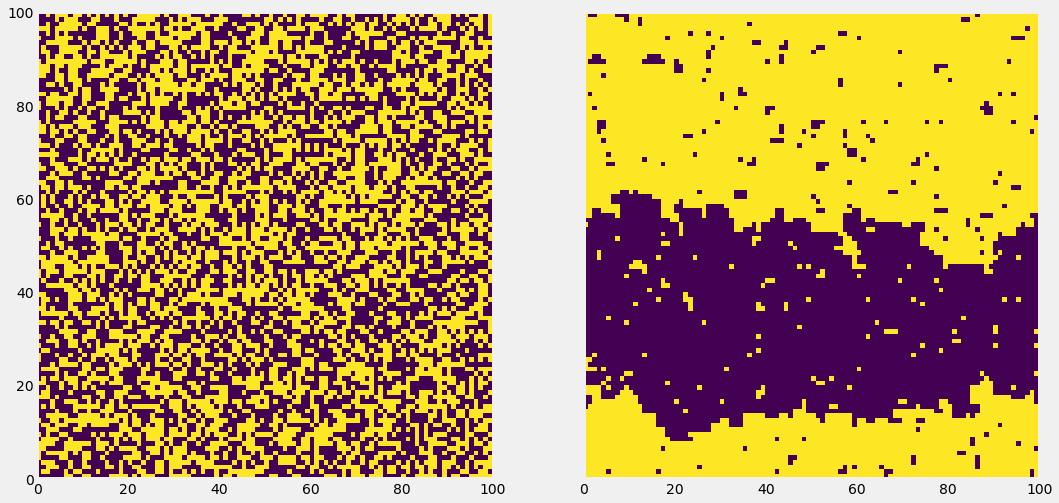

In [131]:
ising(T=2.0, wdth=100, max_turns=500)

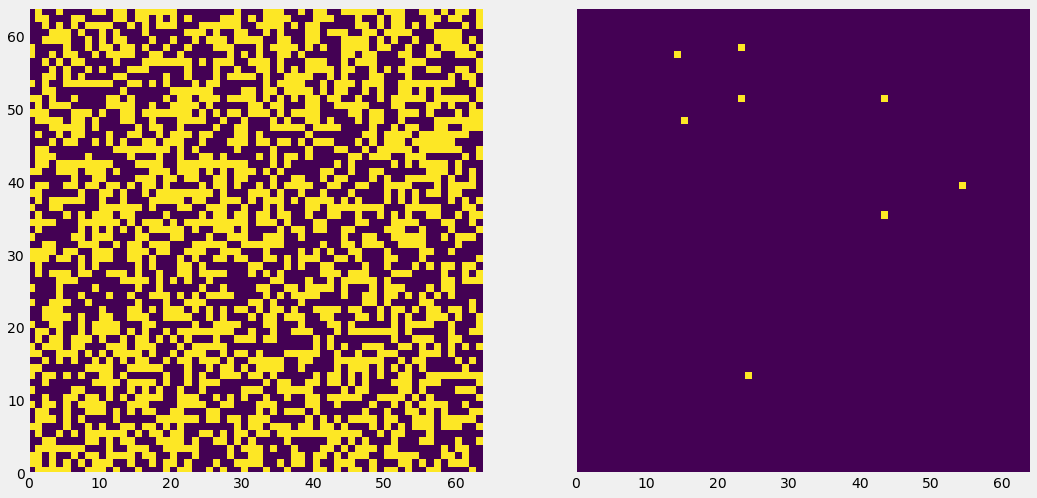

In [132]:
# temperatura odpowiadająca log T ~= 0.8 odpowiada przejściu między magnetykiem a antymagnetykiem
ising(T=1.30, max_turns=500)

### model Isinga
1. ze względu na prawa fizyczne jest idealnym modelem do obserwacji przejść fazowych 
  * prawa mówią, że dla modeli o tym samym wymiarze, zachowanie przenosi się dokładnie
1. ciekawe zachowanie jest dla trójkątów
  * dla $J=1$ zachowanie będzie podobne
  * dla $J=-1$ trójki sąsiadów o tym samym spinie

# Maszyna Boltzmanna
1. składa się z
  * warstwy neuronów ___widzialnych___ $x$
  * warstwy neuronów ___ukrytych___ $h$
  * wag pomiędzy 
    * warstwami widzialną i ukrytą $W$
    * neuronami warstwy widzialnej $U$
    * neuronami warstwy ukrytej $V$
  * __wszystkie__ wagi są __symetryczne__
2. dla modelu określona jest energia
$$E(x,h)=-b^Tx - c^Th -h^TWx -x^Tx - h^TVh$$
  * dla prostoty wszędzie dalej będziemy określali 
    * wszystkie wagi przez $W$
    * wszystkie neurony przez $x$
  * oraz opuszczali temeperaturę $T$
3. prawdopodobieństwo stanu $x$ jest określone przez
$$P(x\mid W)=\frac{1}{Z}\exp(-E(x;W)/k_B\,T)$$
gdzie $Z$ jest __sumą statystyczną__ (partition function)
$$Z(W)=\sum_{x}\exp\left(-\frac{E(x;W)}{k_B\,T}\right)$$
  * stała Boltzmanna $k_B$ jest w $J/\,K$
  * jeśli temperaturę określimy w Kelvinach, to energia jest bezjednostkowa
  * $Z(W)$ jest sumą energii po __wszystkich__ możliwych stanach
  * stany o __niskiej__ energii mają __wyższe__ prawdopodobieństwo
  * __zmniejszanie__ temperatury powoduje skupianie się prawdopodobieństwa na małym podzbiorze stanów o niskiej energii
    * osiągnie stan stabilny
    * __simmulated annealing__, __symulowane wyżarzanie__
      * wyższa tamperatura pozwala na łatwiejsze losowe przeskakiwanie do stanów o wyższej energii, co przyspiesza uczenie
      * trudne procedury prawidłowego schematu obniżania temperatury
      * temperatura musi spadać __nie szybciej__ niżlogarytmicznie, co daje gwarancję zbieżności do minimum
      * zwykle bardzo powolne __wykładnicze__ obniżanie temperatury, np. $$T_k=\alpha\,T_{k-1}$$ dla $\alpha\in(0.8, 0.99)$
      * zakończenie gdy przez określoną liczbę kroków żadna propozycja nie jest akceptowana
4. funkcja log-likelihood układu
$$\begin{align}L(\theta)&=\log\prod_{x\in\,Data}P(X=x)\\&=\sum_{x\in\,Data}\log\,P(X=x)\end{align}$$
5. neurony widzialne i ukryte __różnią__ się
  * neurony widzialne dostają zewnętrzny sygnał (mają ustalane aktywacje)
  * neurony ukryte mają obliczane aktywacje na podstawie widzialnych
6. po obliczeniu ukrytych aktywacji, obliczane są widzialne i warstwami na zmianę aż do osiągnięcia stanu __stabilnego__
7. Przeliczając log-likelihood biorąc pod uwagę definicję energii dla stanu dostajemy
$$\log\left[\prod_{n=1}^NP(x^{(n)})\right]=\sum_{n=1}^N\left[\frac{1}{2}x^{(n)^T}Wx^{(n)}-\log\,Z(W)\right]$$
8. dla minimalizacji log-likelihood obliczamy pochodną po wagach
$$\begin{align}
\frac{\partial}{\partial w_{ij}}\log\,Z(W)&=\sum_xx_ix_jP(x\mid W)\\
&=\langle\,x_i\,x_j\rangle_{P(x\mid W)}\\
\frac{\partial}{\partial w_{ij}}\log\,P(\{x^{(n)}\}_{n=1}^N\mid\,W)&=\sum_{n=1}^N\left[x_i^{(n)}x_j^{(n)}-\langle\,x_i\,x_j\rangle_{P(x\mid W)}\right]\\
&=N\left[\langle\,x_ix_j\rangle_{Data}-\langle\,x_i\,x_j\rangle_{P(x\mid W)}\right]
\end{align}$$
  * pierwszy składnik ostatniego wyrażenia
    * iloczyny skalarne pomiedzy neuronami dla wartosci wylosowanych (wysamplowanych) z prawdziwego rozkładu danych $Data$
    * to tzw. faza __świadomości__, faza __dodatnia__
  * drugi składnik
    * iloczyny skalarne dla wszystkich możliwych stanów
    * obejmuje także stany warstwy ukrytej
    * to tzw. faza __marzeń sennych__, faza __ujemna__

## Restricted Boltzmann Machine RBM
1. uczenie maszyny Boltzmanna w cyklu fazy dodatniej-ujemnej jest __bardzo__ powolne
2. ograniczenie maszyny B. przez usunięcie połączeń wewnątrz warstw widzialnej i ukrytej
$$\begin{align}
E(x,h)&=-b^{T}x-c^{T}h-h^{T}Wx\\
P(h\mid x)&=\prod_{i}P(h_{i}\mid x)\\
P(x\mid h)&=\prod_{i}P(x_{j}\mid h)\\
P(h_{i}=1\mid x)&=\frac{exp(c_{i}+W_{i}x)}{1+exp(c_{i}+W_{i}x)}=sigm(c_{i}+W_{i}x)
\end{align}$$
3. neurony w poszczególnych warstwach stają się __niezależne__ od siebie i można je liczyć niezależnie
  * aktywacje dla ukrytych w zależności od widzialnych z ustawioną aktywacją (clamped) $P(h\mid x)$
  * widzialnych na podstawie ukrytych można liczyć niezależnie
4. uczenie
  1. dla każdej $w_{ij}$ korelacja $\langle\,v_i^0h_j^0\rangle$ dla zadanych widzialnych
  2. próbkowanie Gibbsa aż do osiągnięcia stanu stabilnego i korelacji $\langle\,v_i^\infty\,h_j^\infty\rangle$
  3. gradient
  $$\frac{\partial\,\log\,p(v^0)}{\partial\,w_{ij}}=\langle\,v_i^0h_j^0\rangle-\langle\,v_i^\infty\,h_j^\infty\rangle$$
5. Hinton pokazał, że __wystarczy__ przeprowadzić __dwa__ cykle prżetwarzania
  * obliczanie aktywacji ukrytych wprzód
  * obliczenie wejściowych na podstawie ukrytych
  * by uzyskać wystarczające przybliżenie całego procesu

## Deep Boltzmann Machine
1. RBM __nie jest__ wystarczającym modelem
2. uczenie głębokiego modelu w oczywisty sposób napotkało na trudności
  * trudność z definicją przetwarzania wprzód-wstecz
  * zanikanie sygnału gradientu
    * wykorzystane aktywacje sigmoidalne
  * problem z definicją uczenia nadzorowanego
3. Hinton (i współpracownicy) pokazał algorytm __zachłannego__ uczenia modelu
  * uczenie nadzorowane ze wstępnym etapem uczenia nienadzorowanego
  * rozpoczynamy od prostej RBM złożonej z warstw $x, h_1$
  * ta jest uczona do stanu względnej stabilności
  * dodawana jest nowa warstwa tworząca na szczycie nową RBM
  * znowu uczenie jej do stanu stabilności
    * ustalenie likelihood dla $P(h_2\mid h_1)$
  * tak do osiągniecia ustalonej liczby warstw
  * to kończy wstępny etap uczenia __nienadzorowanego__
  * na szczycie warstwa z uczeniem nadzorowanym
  * uczenie tej warstwy
  * następnie __tuning__ całego modelu w trybie nadzorowanym
3. Salakhutdinov zaproponował rozszerzenie
  * podobnie zachłanne uczenie
  * w trakcie dodawania nowych warstw i uczenia $P(h_k\mid h_{k-1})$
    * uczenie $P(h_{k-1}\mid h_k)$ i wstecz
  * bardzo złożony algorytm nawet mimo kilku sprytnych trików
  